### Imports

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from terminaltables import AsciiTable

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cmap = plt.get_cmap('viridis')

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Load dataset

In [2]:
article_dataset = pd.read_pickle("data/articles")

### Extract article texts and targets (news or blog)

In [3]:
articles = []
targets = []

target_encoding = {
    "News": 0,
    "Blog": 1
}

for i in tqdm(range(article_dataset.shape[0]), desc="Extracting articles"):
    text = article_dataset.iloc[i]["content"]
    articles.append(text)
    
    target_name = article_dataset.iloc[i]["media-type"]
    target = target_encoding[target_name]
    targets.append(target)
    
targets = np.array(targets)

Extracting articles: 100%|██████████| 6000/6000 [00:03<00:00, 1649.08it/s]


### Get token counts

In [4]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(articles)
X_counts.shape

(6000, 82153)

### Get features

In [21]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_counts)
X_tf = tf_transformer.transform(X_counts)
X = X_tf.toarray()

### Save feature set

In [22]:
np.save("data/auto_extracted_features", X)

### Plot data in 2D using PCA

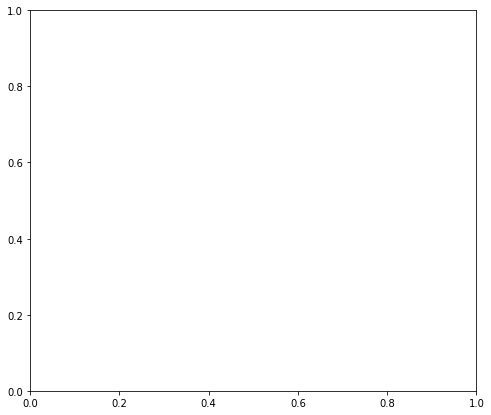

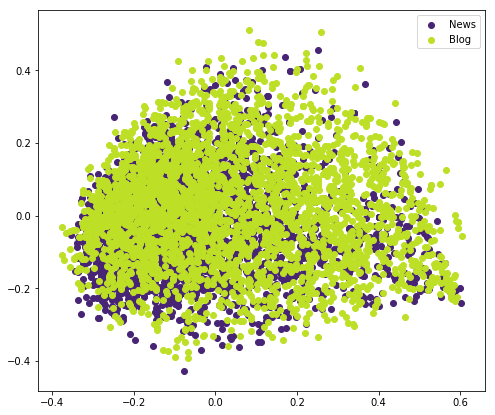

In [24]:
X_embedded = PCA(n_components=2).fit_transform(X)

x1 = X_embedded[:, 0]
x2 = X_embedded[:, 1]

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)

colors = [cmap(0.1), cmap(0.9)]

class_distr = []
# Plot the different class distributions
for i in range(2):
    _x1 = x1[targets == i]
    _x2 = x2[targets == i]
    class_distr.append(ax.scatter(_x1, _x2, color=colors[i]))

plt.legend(class_distr, ["News", "Blog"], loc=1)

plt.show()
plt.close()